<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Clustering%20and%20Unsupervised%20Learning/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

## 1. Understand K-means

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

We randomly generate some groups of data in 2-d space

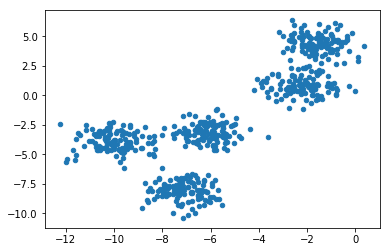

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=600, centers=5, cluster_std=0.8, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=20);

Then we run the K-means algorithm, find out the centroid of each group of data, and make predictions.

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
kmeans.cluster_centers_

array([[-6.11398201, -3.11924685],
       [-1.55383662,  4.44779912],
       [-7.12477649, -8.09803975],
       [-9.98787166, -3.88556349],
       [-2.17812827,  0.7903456 ]])

Finally we plot the data with predicted values in differnt colors, and show centroid in red circle.

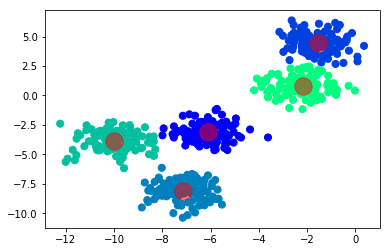

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5);

## 2. K-means for image compression

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [0]:
from sklearn.datasets import load_sample_image
image = load_sample_image("flower.jpg")


In [7]:
data = image / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape


(273280, 3)

In [0]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)

centers = kmeans.cluster_centers_
reduced_colors = centers[kmeans.predict(data)]


In [9]:
kmeans.cluster_centers_

array([[0.2003268 , 0.24934641, 0.03300654],
       [0.77689076, 0.55007003, 0.32822129],
       [0.00451948, 0.27011343, 0.27018377],
       [0.01997386, 0.09654031, 0.0704488 ],
       [0.78529412, 0.25085784, 0.02193627],
       [0.87647059, 0.68133624, 0.45984023],
       [0.89166667, 0.75326797, 0.57908497],
       [0.65803922, 0.14470588, 0.01215686],
       [0.01721133, 0.18752723, 0.12883987],
       [0.52588235, 0.39215686, 0.20470588],
       [0.12957516, 0.19787582, 0.16707516],
       [0.88930906, 0.59780579, 0.34262372],
       [0.0124039 , 0.20803317, 0.20110564],
       [0.61647059, 0.01803922, 0.01934641],
       [0.00200692, 0.32975779, 0.3594233 ],
       [0.82804774, 0.42634271, 0.171526  ]])

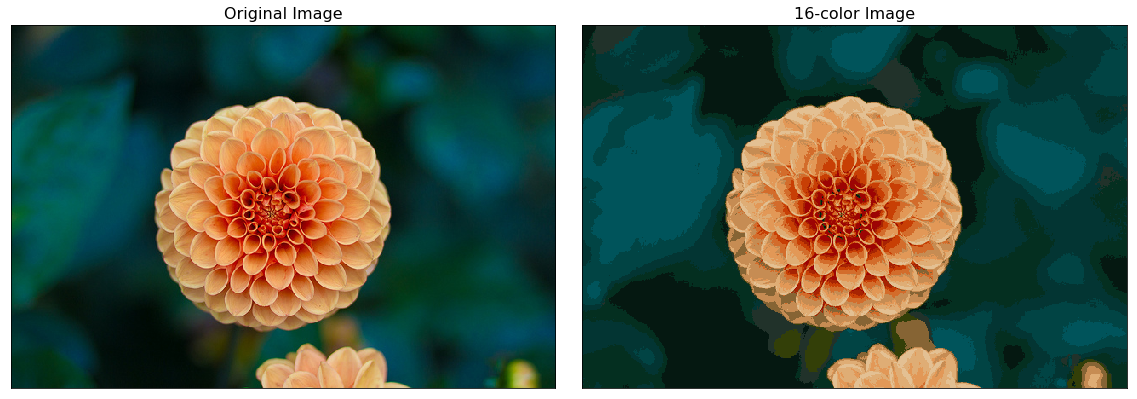

In [10]:
image_recolored = reduced_colors.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(20, 8),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(image_recolored)
ax[1].set_title('16-color Image', size=16);
plt.show()

In [0]:
r = []
g = []
b = []

for line in image:
  for pixel in line:
    temp_r, temp_g, temp_b = pixel
    r.append(temp_r)
    g.append(temp_g)
    b.append(temp_b)

In [0]:
centers = centers * 255

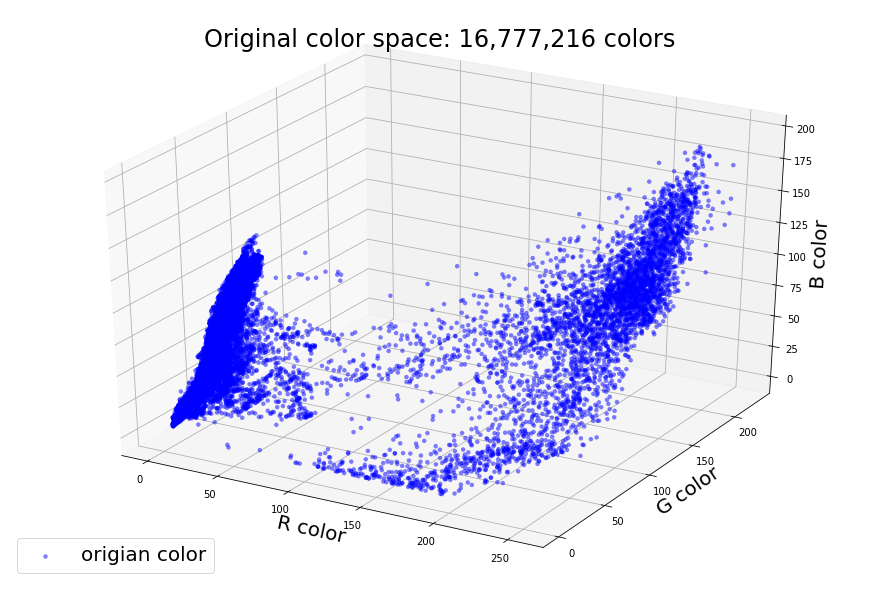

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(1, figsize=(12, 8))

ax = Axes3D(fig)
ax.scatter(r[::16], g[::16], b[::16], facecolor="blue", lw=0, s=20, alpha=0.5, label='origian color')
ax.set_xlabel('R color', fontsize=20)
ax.set_ylabel('G color', fontsize=20)
ax.set_zlabel('B color', fontsize=20)
ax.set_title('Original color space: 16,777,216 colors', fontsize=24)
ax.legend(loc='lower left', fontsize=20)

plt.show()

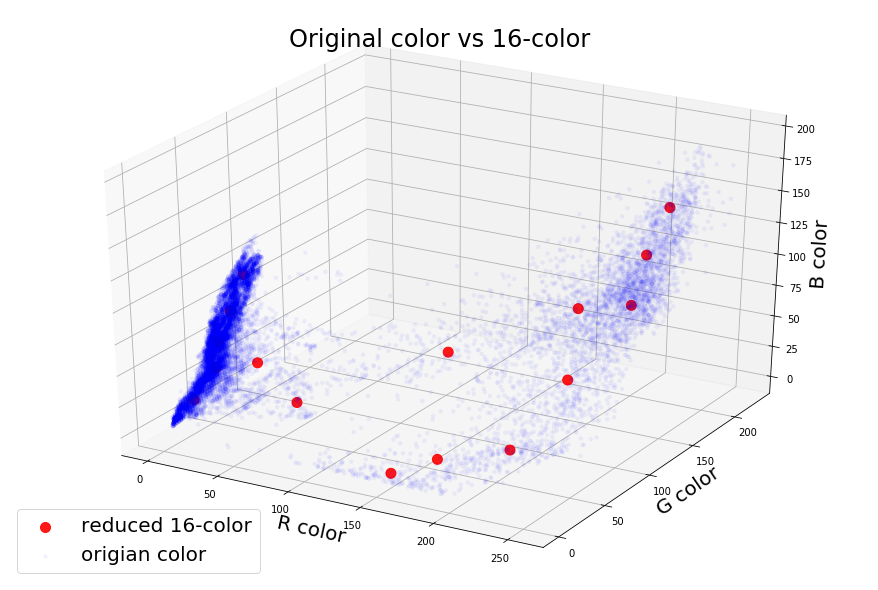

In [33]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax = Axes3D(fig)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=100, alpha=0.9, label='reduced 16-color')
ax.scatter(r[::16], g[::16], b[::16], facecolor="blue", lw=0, s=20, alpha=0.05, label='origian color')
ax.set_xlabel('R color', fontsize=20)
ax.set_ylabel('G color', fontsize=20)
ax.set_zlabel('B color', fontsize=20)
ax.set_title('Original color vs 16-color', fontsize=24)
ax.legend(loc='lower left', fontsize=20)

plt.show()